# Isomap

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [3]:
# load data

data = np.loadtxt("3Ddata.txt")
data.shape

(500, 4)

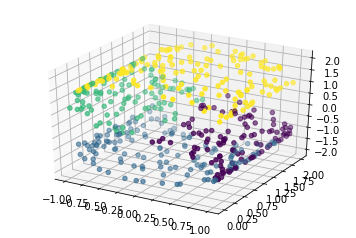

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2],c = data[:,3])

In [5]:
n = len(data)
ISOdata = data[:,range(0,3)]
ISOlabel = data[:,3]

#Find distance between all pairs
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(ISOdata)
distances, indices = nbrs.kneighbors(ISOdata)
distanceMatrix = np.full((n, n), np.inf)

for i in range(0,n):
     distanceMatrix[i,indices[i,:]] = distances[i,:]

# Symmetric matrix
for i in range(0,n):
    for j in range(0,n):
        if distanceMatrix[i,j] > distanceMatrix[j,i]:
            distanceMatrix[i,j] = distanceMatrix[j,i]

#Matrix with the shortest distance
for k in range(0,n):
    for i in range(0,n):
        for j in range(0,n):
            if distanceMatrix[i,j] > distanceMatrix[i,k] + distanceMatrix[k,j]:
                distanceMatrix[i,j] = distanceMatrix[i,k] + distanceMatrix[k,j]

In [6]:
Gram_mat = np.full((n,n),0)
p_mat = np.eye(n) - (1/n)*np.full((1,n),1)*(np.full((1,n),1)).T
p_mat = np.matrix(p_mat)
Gram_mat = -0.5*p_mat*np.square(distanceMatrix)*p_mat

In [7]:
[w, V] = np.linalg.eig(Gram_mat)

Evalue_gram = np.sort(w)
Evector_gram = V[:, w.argsort()]

In [8]:
Diag_gram = np.matrix(np.zeros((2,2)))
Diag_gram[0,0] = np.sqrt(Evalue_gram[-1])
Diag_gram[1,1] = np.sqrt(Evalue_gram[-2])

In [9]:
Q = np.column_stack((Evector_gram[:,-1],Evector_gram[:,-2]))
Q = np.matrix(Q)
Y_iso = Q*Diag_gram           # Y = Q*Diag^(1/2)

In [10]:
ll=np.matrix(ISOlabel).T      # Label type change

Text(0.5,1,'Dimensionality Reduction by Isomap')

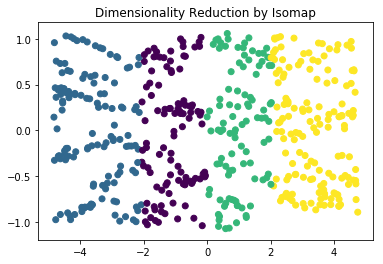

In [11]:
plt.scatter([Y_iso[:,0]], [Y_iso[:,1]],c=[ll])
plt.title('Dimensionality Reduction by Isomap')

The isomap contains the distance between all observations. 

The 2-dimensional plot looks like a spread-out original 3D scatter. 

This indeed preserves the distance in the manifold of the data. 

The algorithm takes too long time due to the Floyd-Warshall algorithm.